# ML using Python - SVM ( Support Vector Machine )

Priyaranjan Mohanty

## SVM - Support Vector Machine

Support Vector Machines is one of the most popular and widely used supervised machine learning algorithms.

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces.

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. 

### SVM - How it works ?

SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.


SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.


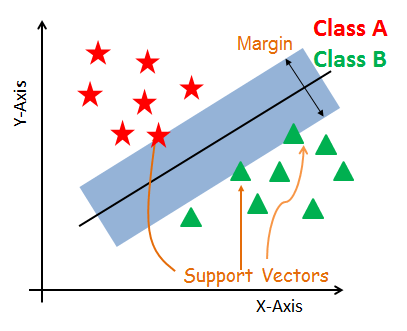

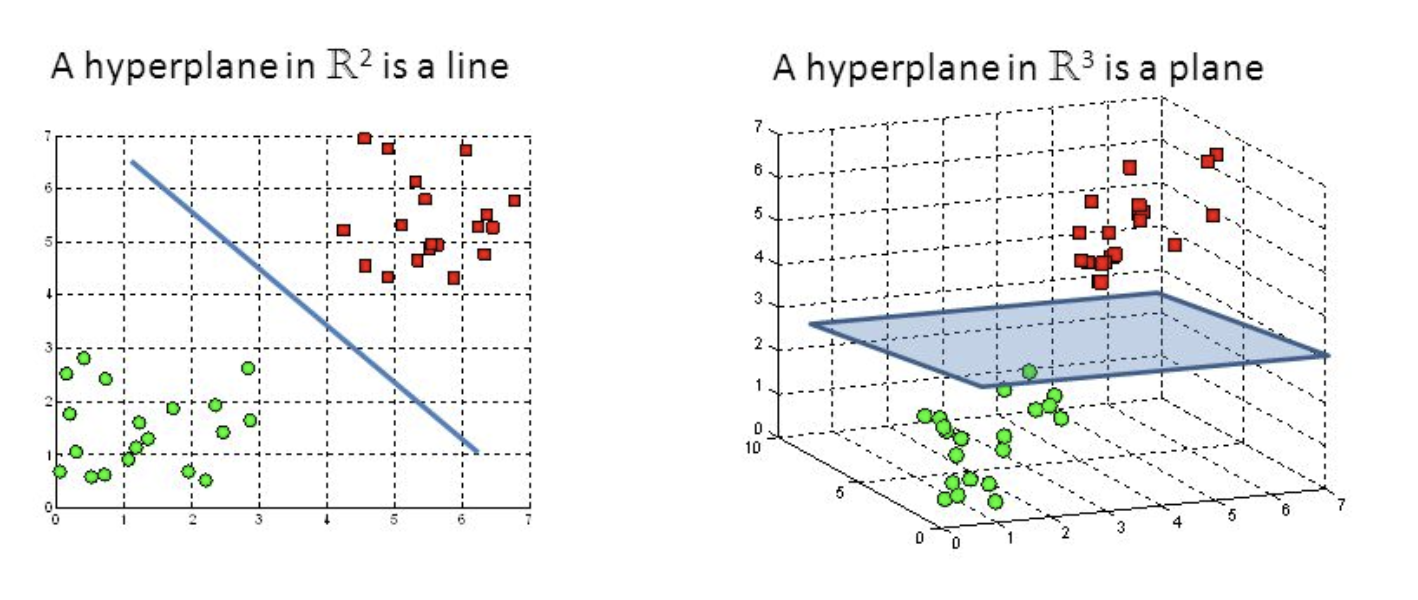

<b>Support Vectors</b>
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

<b>Hyperplane</b>
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

<b>Margin</b>
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

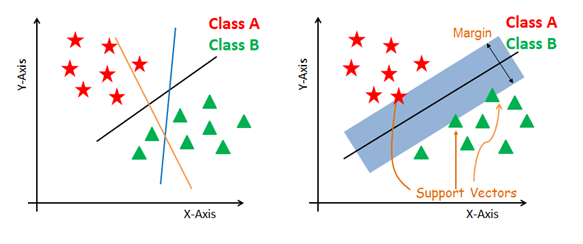

Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

## Case Study : Classification of Breast Cancer using SVM

### Problem / Opportunity Statement 

We will use the cancer dataset, which is a very famous binary-class classification problem. 

This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 

They describe characteristics of the cell nuclei present in the image.

The dataset comprises 30 features and a target (type of cancer)

This data has two types of cancer classes: 
    
    malignant (harmful) and 
    
    benign (not harmful).
    

Our Objective is to build a model to classify the type of cancer.

### Step 1 : Load the Libraries

In [14]:
#Import scikit-learn dataset library
from sklearn import datasets

import pandas as pd

### Step 2 : Load the Data 

In [15]:
#Load dataset
cancer_DF = datasets.load_breast_cancer()

In [16]:
print(cancer_DF.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [17]:
cancer_DF.data.shape

(569, 30)

In [18]:
cancer_DF.target.shape

(569,)

### Step 3 : Split the Data into train & test 

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set - 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(cancer_DF.data, cancer_DF.target, 
                                                    test_size=0.2,
                                                    random_state=109) 

### Step 4 : Building & Training the SVM Model 

In [20]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
SVM_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Step 5 : Predict the Response for Test Data 

In [21]:
#Predict the response for test dataset
y_pred = SVM_clf.predict(X_test)

In [22]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1])

### Step 6 : Evaluating the Model

In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


### We can also check precision and recall of model.

In [24]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision :",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall    :",metrics.recall_score(y_test, y_pred))

Precision : 0.9859154929577465
Recall    : 0.9459459459459459


### Tuning Hyperparameters

<b>Kernel:</b> The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.


<b>Regularization:</b> Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.


<b>Gamma:</b> A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

<u><b>Advantages</b></u>

SVM Classifiers offer good accuracy and perform faster prediction compared to other algorithms. 

They also use less memory because they use a subset of training points in the decision phase. 

SVM works well with a clear margin of separation and with high dimensional space.


<u><b>Disadvantages</b></u>
  
SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Other algorithms. 

It works poorly with overlapping classes and is also sensitive to the type of kernel used.